In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_text
import statsmodels.api as sm

In [19]:
df= pd.read_csv('college_student_placement_dataset.csv')

In [20]:
df.head(10)

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
5,CLG0015,96,5.26,5.32,7,No,5,8,0,No
6,CLG0071,123,6.68,6.58,5,No,7,8,2,Yes
7,CLG0096,111,8.77,8.76,7,No,3,1,2,Yes
8,CLG0097,92,6.47,6.33,9,No,7,8,5,No
9,CLG0057,108,8.82,8.60,4,No,5,9,1,No


In [21]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [23]:
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [24]:
df.dtypes

College_ID                 object
IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience      object
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
Placement                  object
dtype: object

In [25]:
df['Placement_numeric']=df['Placement'].map({'Yes': 1 , 'No' : 0})
df['Intership_Experience_numeric']=df['Internship_Experience'].map({'Yes' : 1 , 'No': 0})

C:\Users\moral\AppData\Local\Temp\ipykernel_7760\3135047550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Placement',y=col,palette='Dark2',legend=False)
C:\Users\moral\AppData\Local\Temp\ipykernel_7760\3135047550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Placement',y=col,palette='Dark2',legend=False)
C:\Users\moral\AppData\Local\Temp\ipykernel_7760\3135047550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Placement',y=col,palette='Dark2',legend=False)
C:\Users\moral\AppData\Local\Temp\ipy

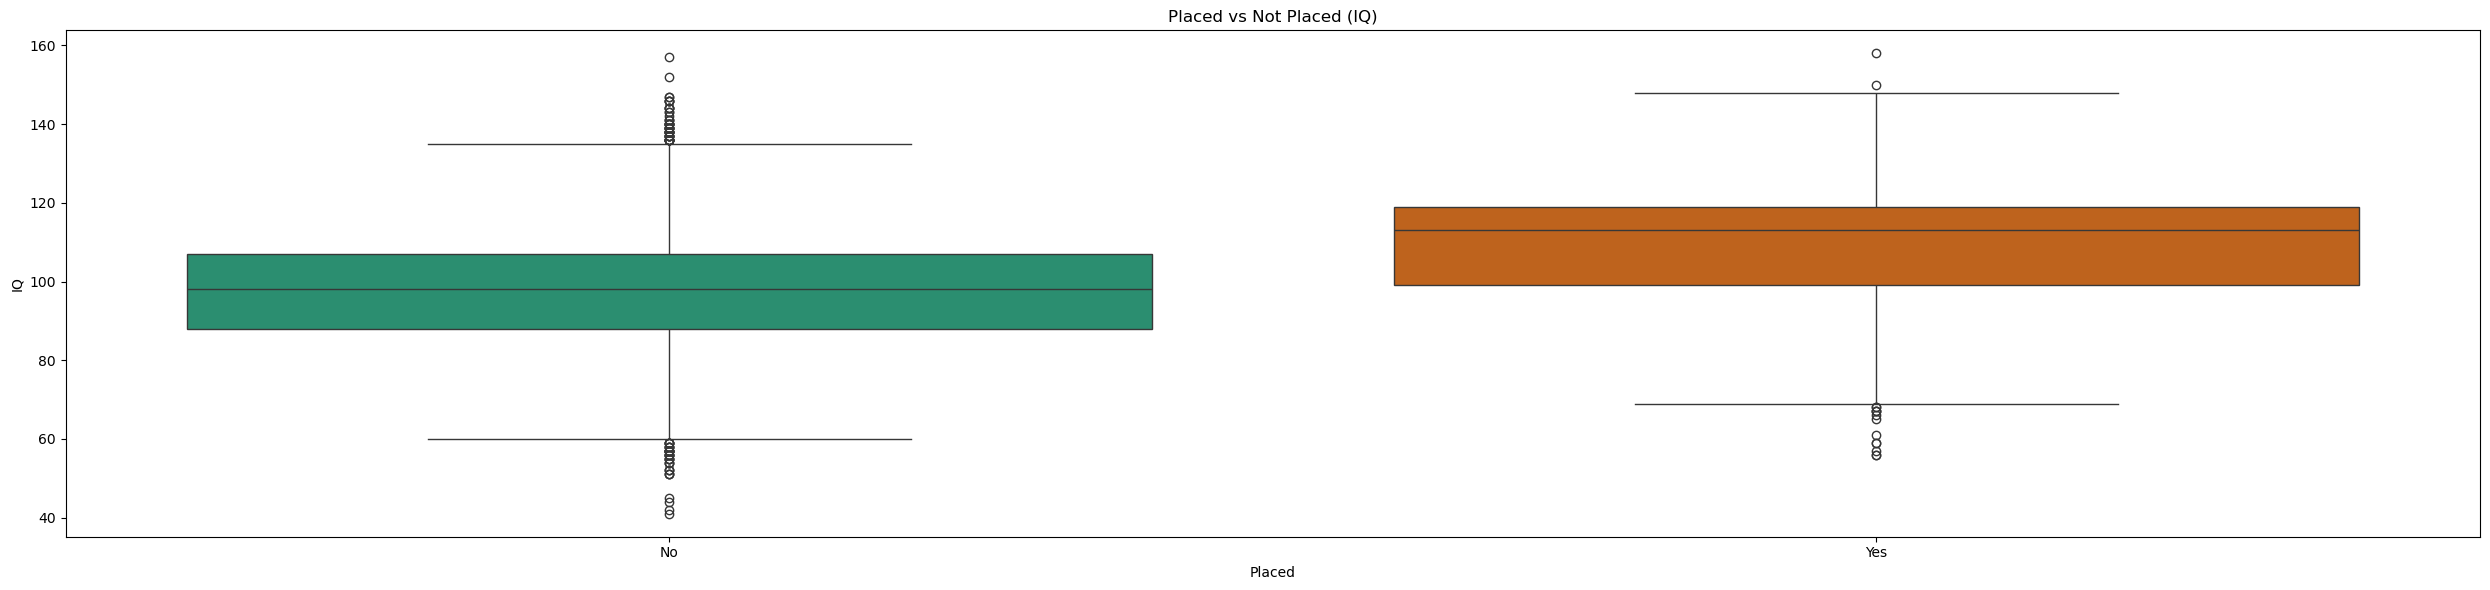

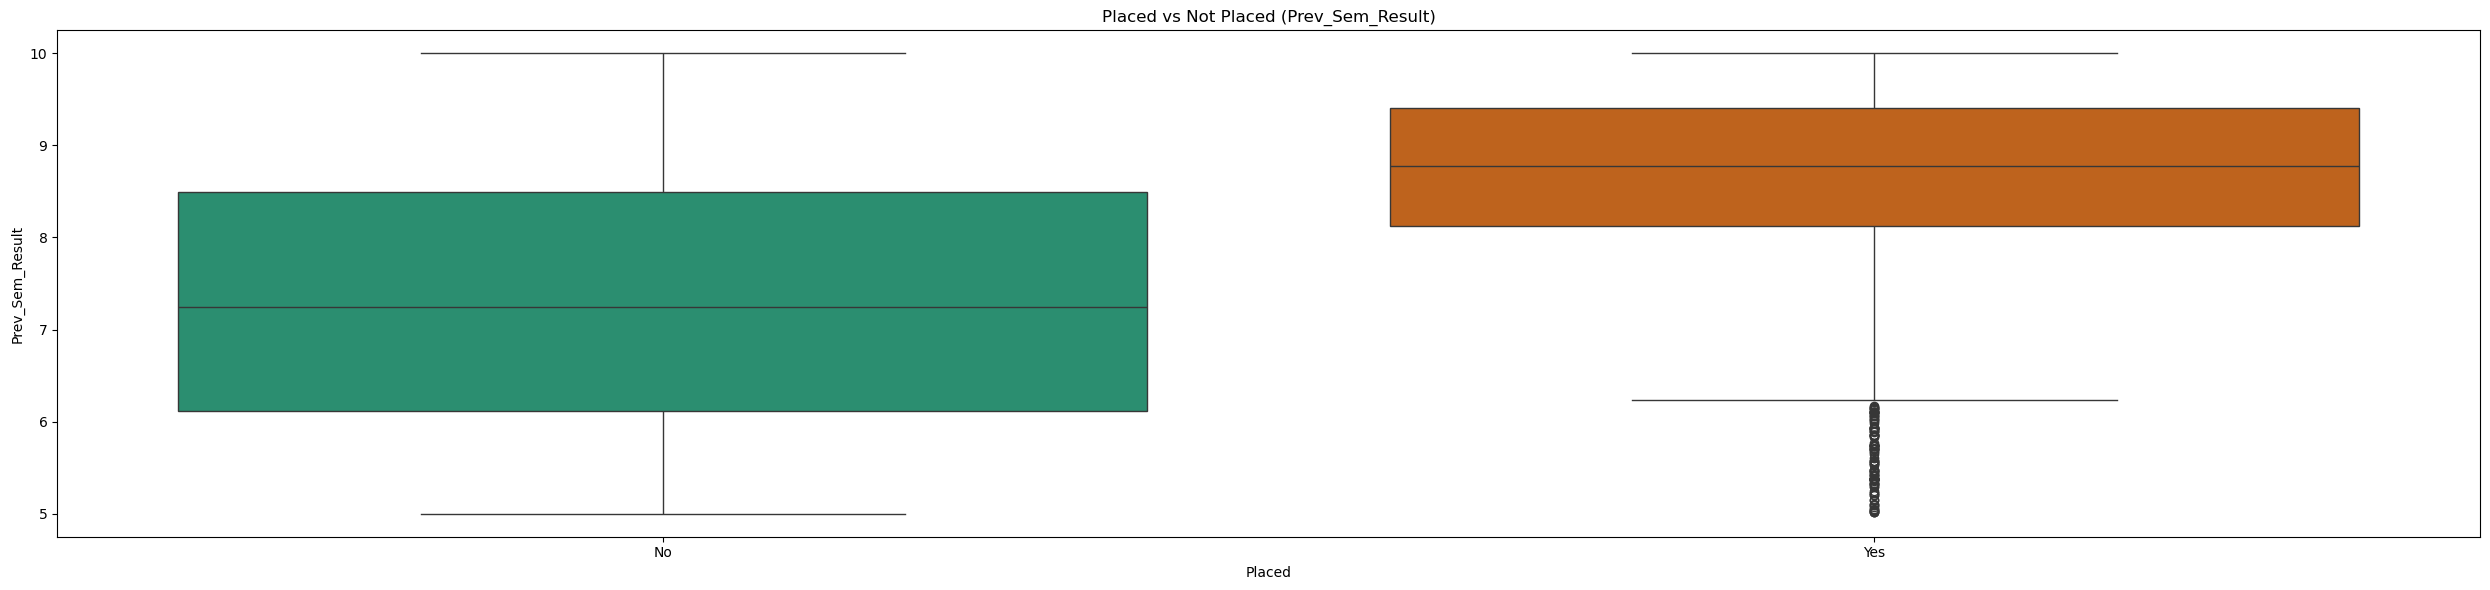

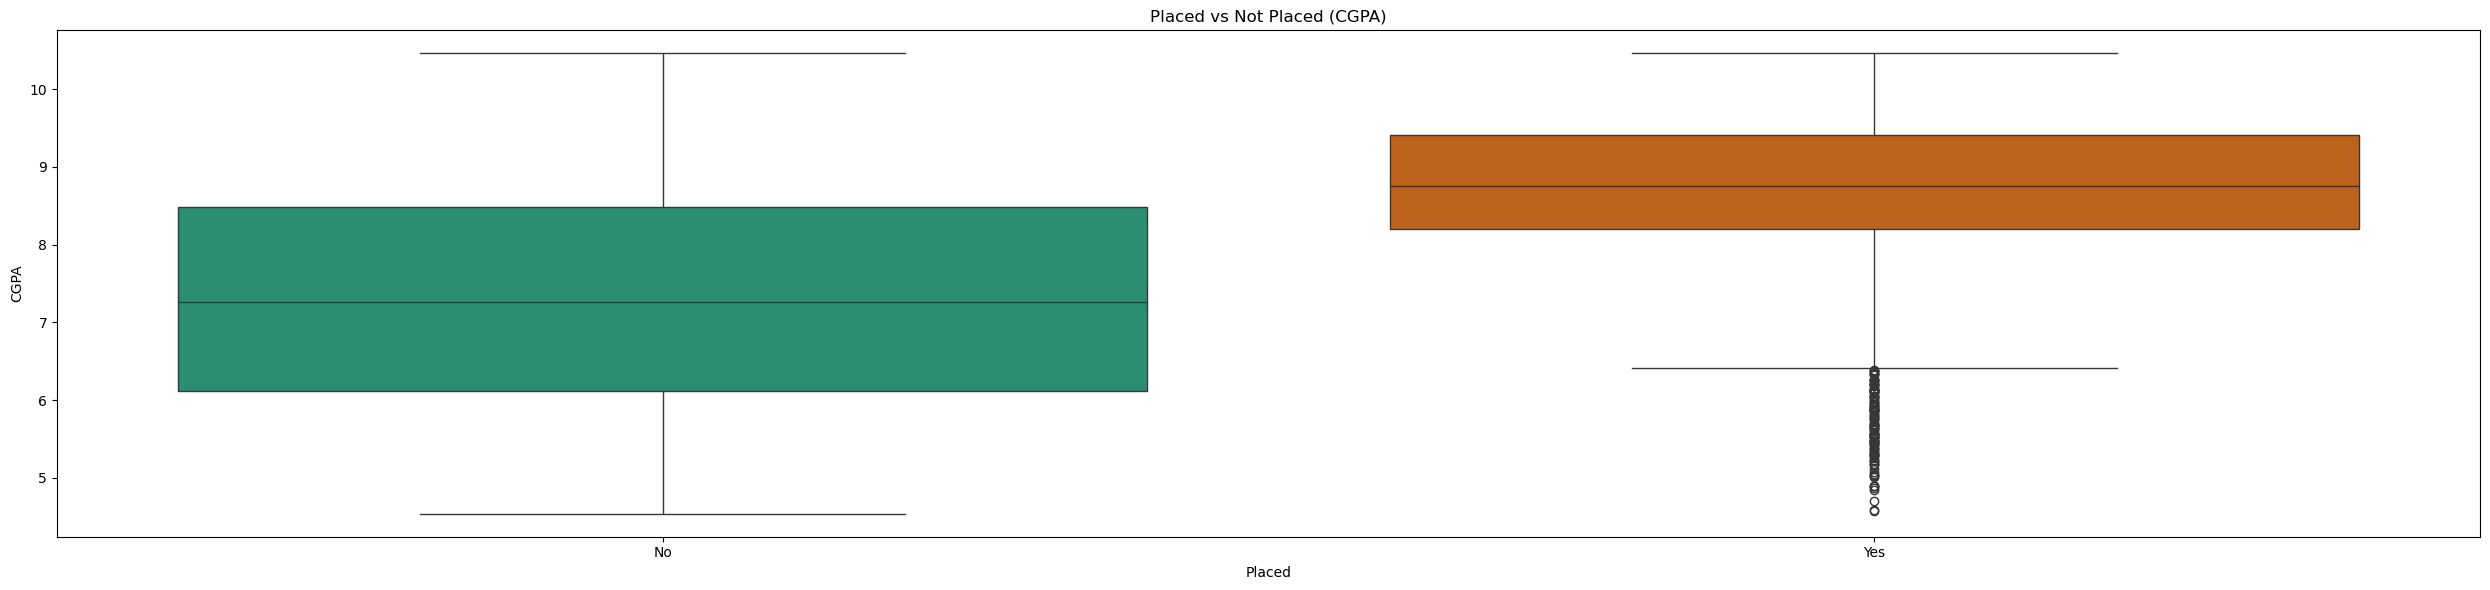

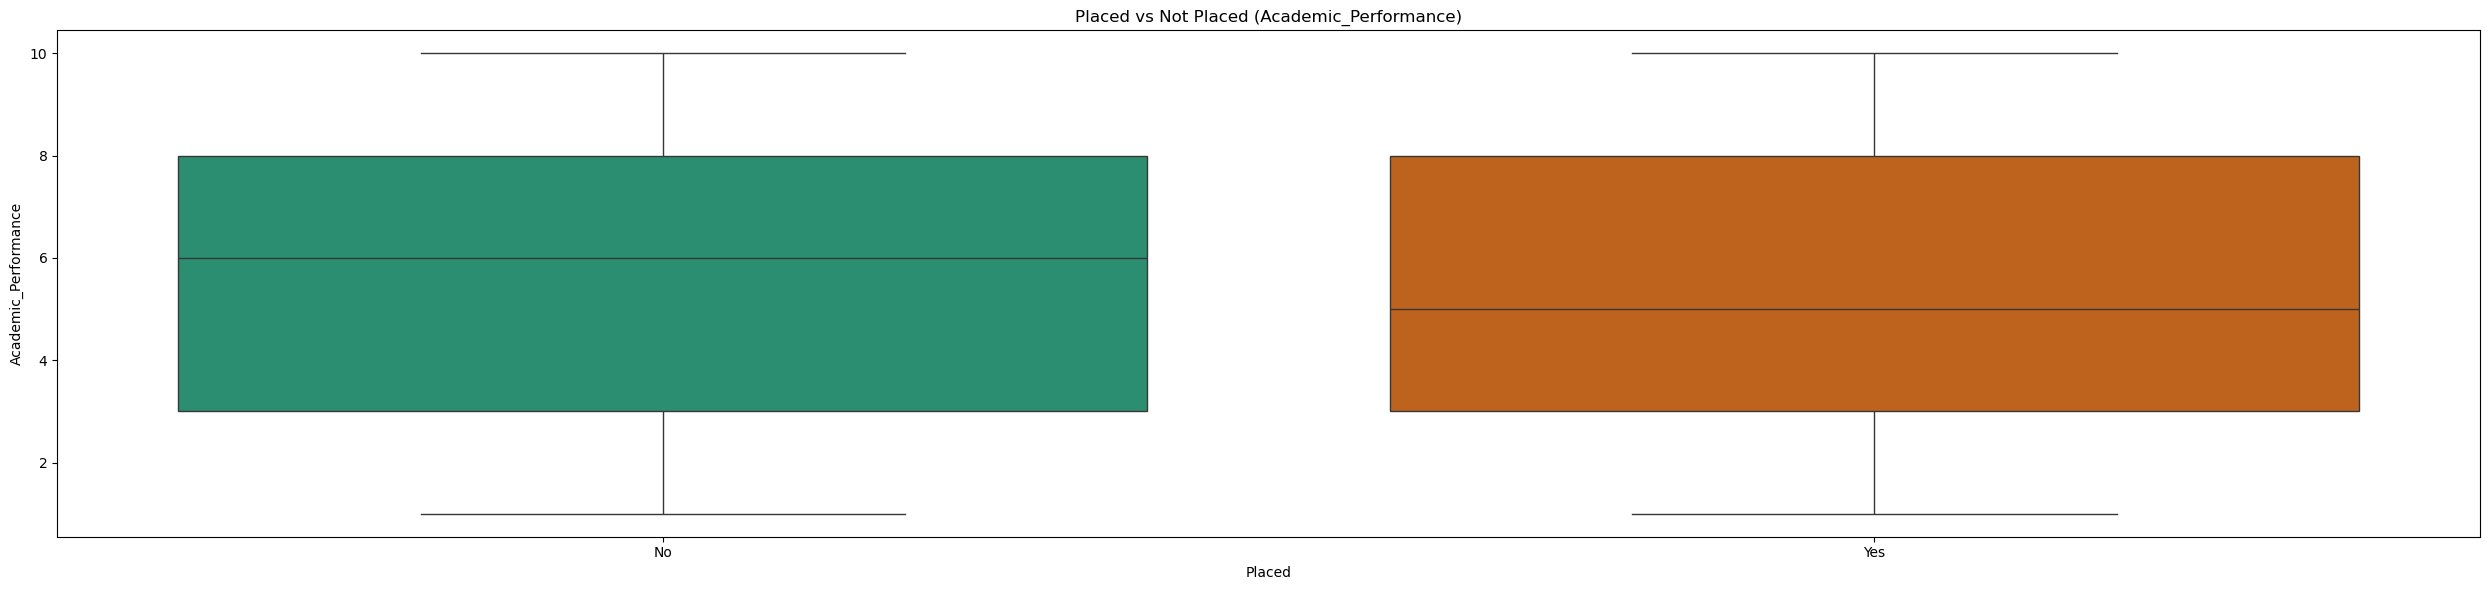

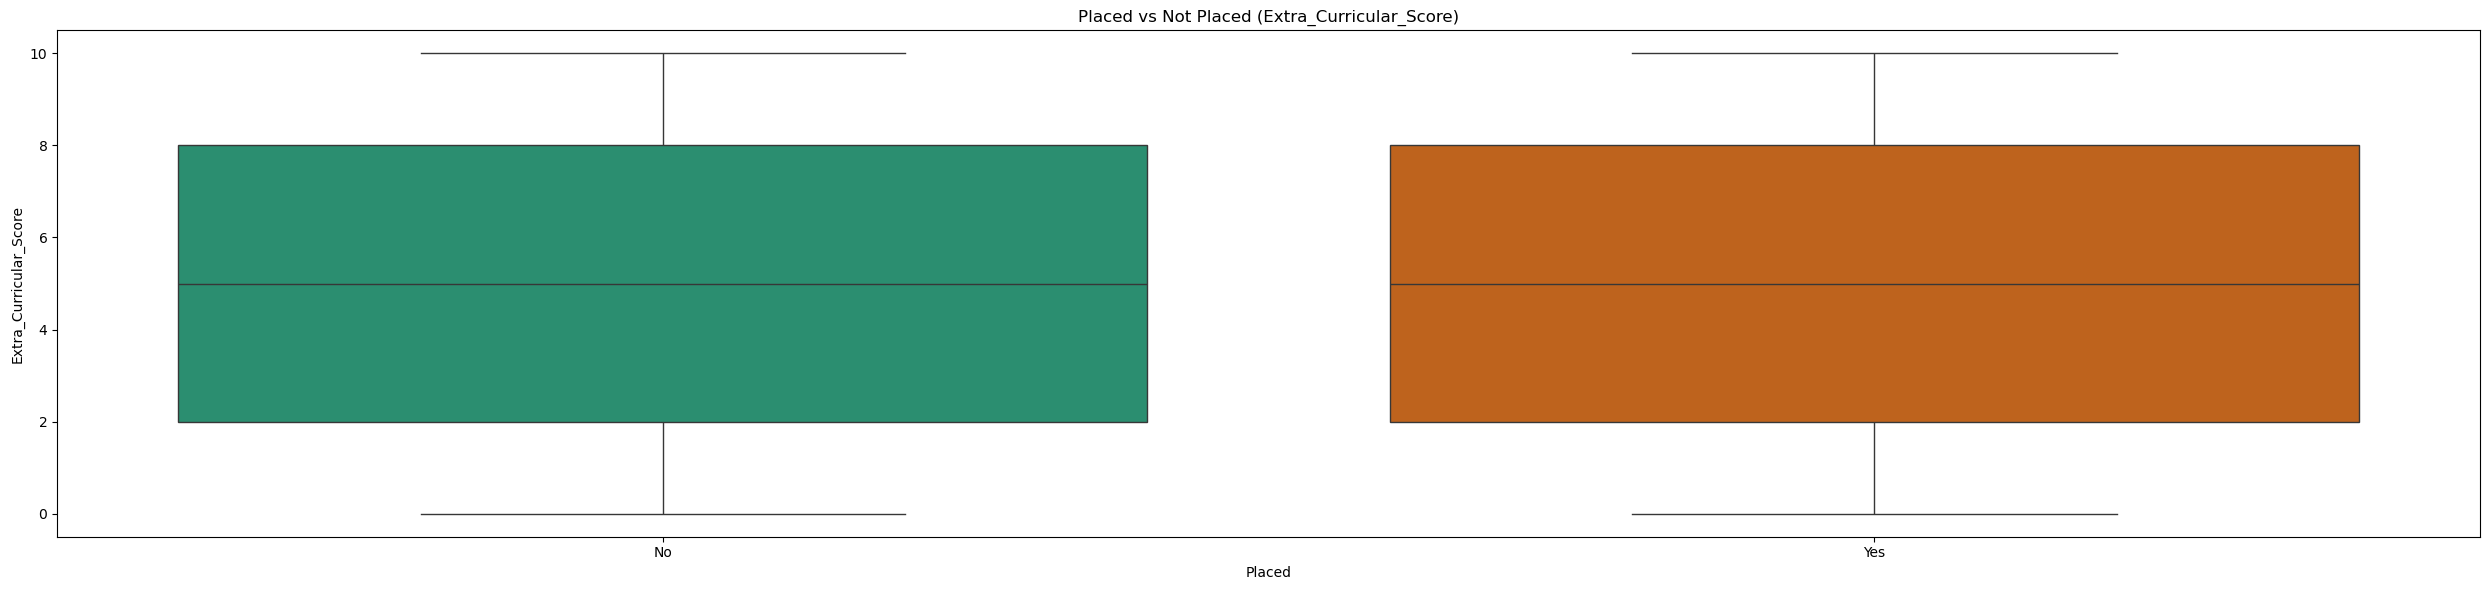

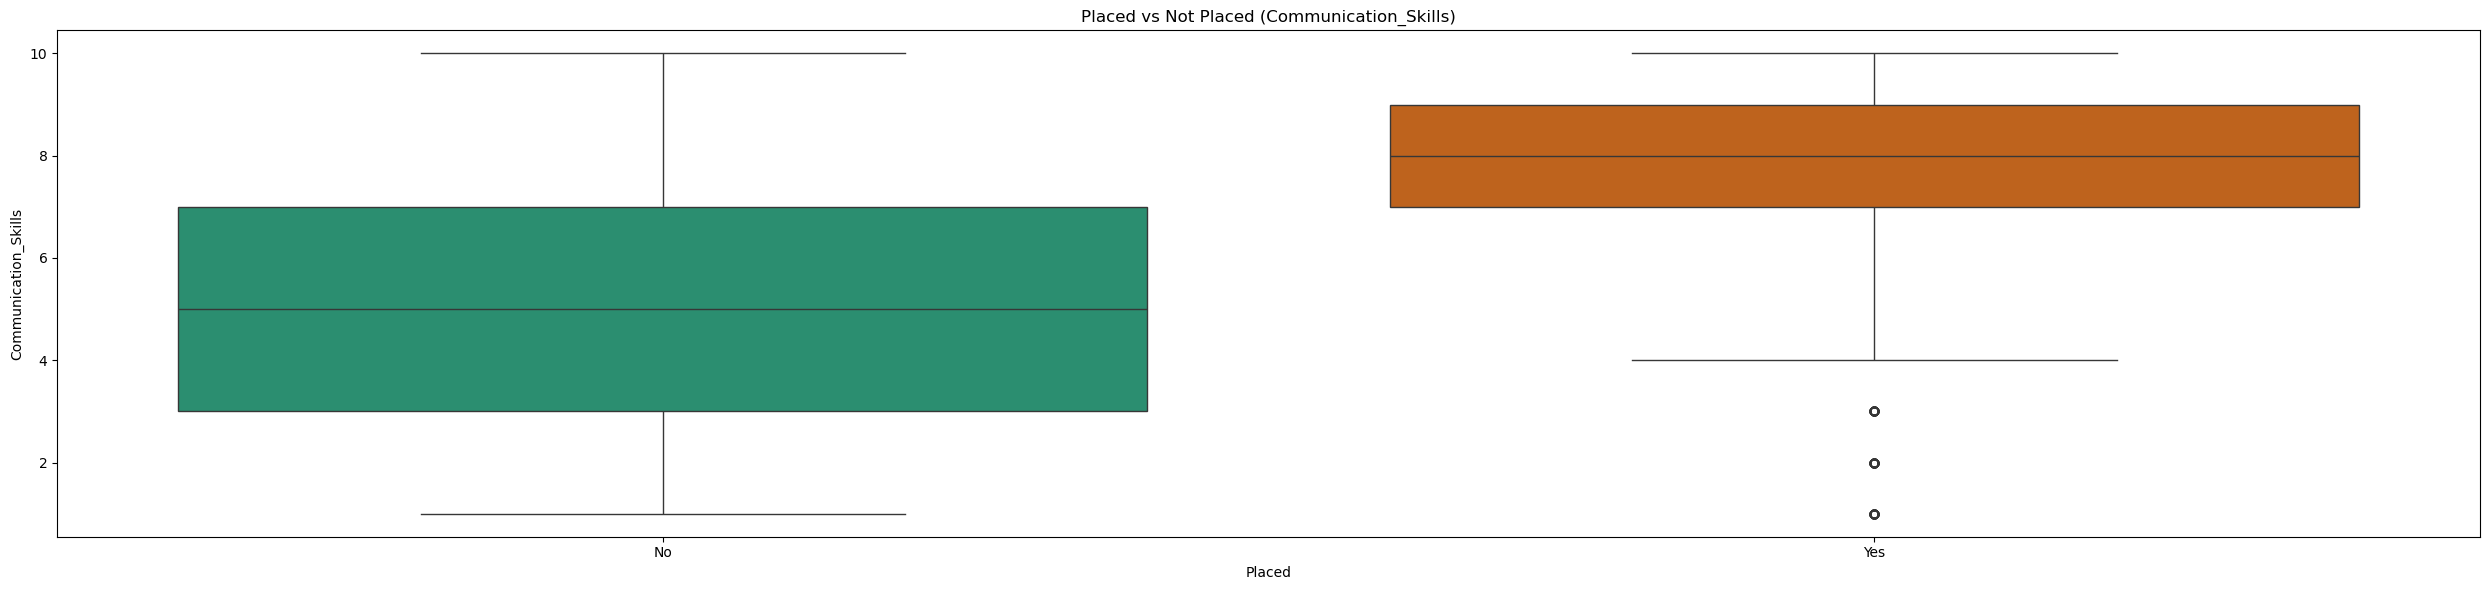

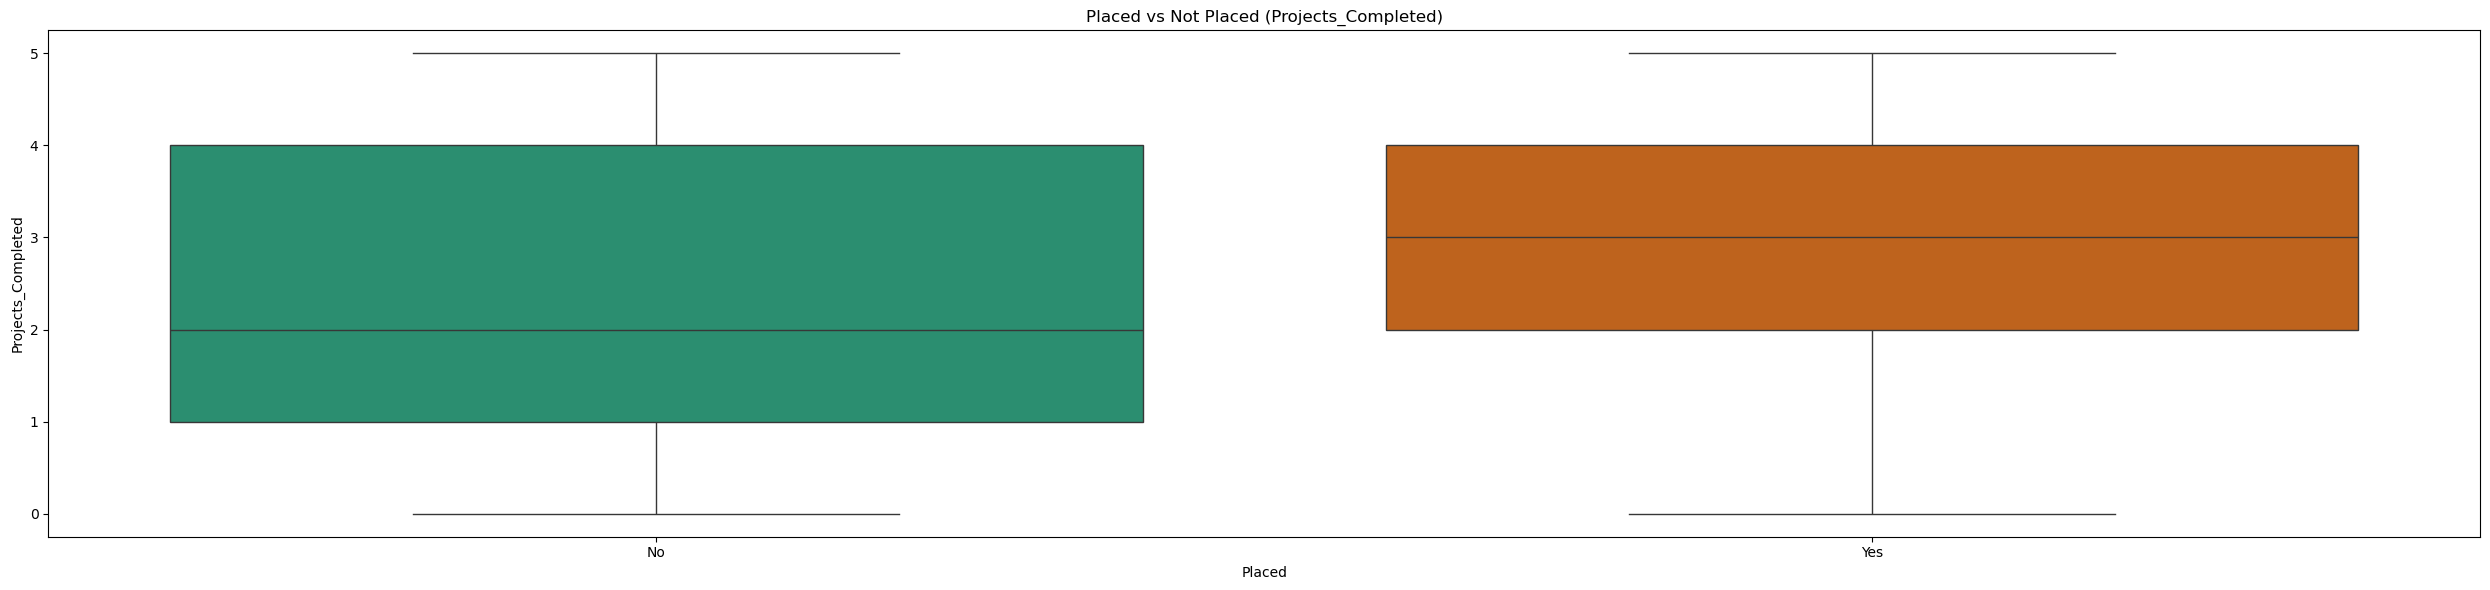

In [26]:
var=df.select_dtypes(include = 'number')
for col in var.columns:
    if col not in ['Placement_numeric','Intership_Experience_numeric']:
        plt.figure(figsize=(25,6))
        sns.boxplot(data=df,x='Placement',y=col,palette='Dark2',legend=False)
        plt.title(f"Placed vs Not Placed ({col})")
        plt.xlabel('Placed')
        plt.ylabel(col)
        plt.tight_layout()
        plt.savefig(f"{col}.png")

In [27]:
# Con estas graficas de bigotes queria verificar que variables parecen tener mas significancia para asi poderlas graficar en un grafico de dispersion 
#y ver si siqguen una tendencia lineal, las variables que podemos observar con mayor significancia son estas [iq,prev_Sem_result,cpga,communication_skills]

In [28]:
columnas_numericas = df.select_dtypes(include='number').columns.tolist()
columnas_numericas.remove('Placement_numeric')

x=df[columnas_numericas]
x= sm.add_constant(x)
y= df['Placement_numeric']

In [29]:
modelo = sm.Logit(y,x)
resultado = modelo.fit()

Optimization terminated successfully.
         Current function value: 0.218626
         Iterations 9


In [30]:
print(resultado.summary())

                           Logit Regression Results                           
Dep. Variable:      Placement_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Fri, 25 Jul 2025   Pseudo R-squ.:                  0.5134
Time:                        12:58:18   Log-Likelihood:                -2186.3
converged:                       True   LL-Null:                       -4493.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -29.1898      0.733    -39.843      0.000     -30.626     -27.754
IQ                               0.1088      0.004     31.003      0.000     

In [31]:
var_significativas= ['IQ','Prev_Sem_Result','CGPA','Communication_Skills','Projects_Completed']

Text(0.5, 1.02, 'Comparacion de variables segun la colocacion')

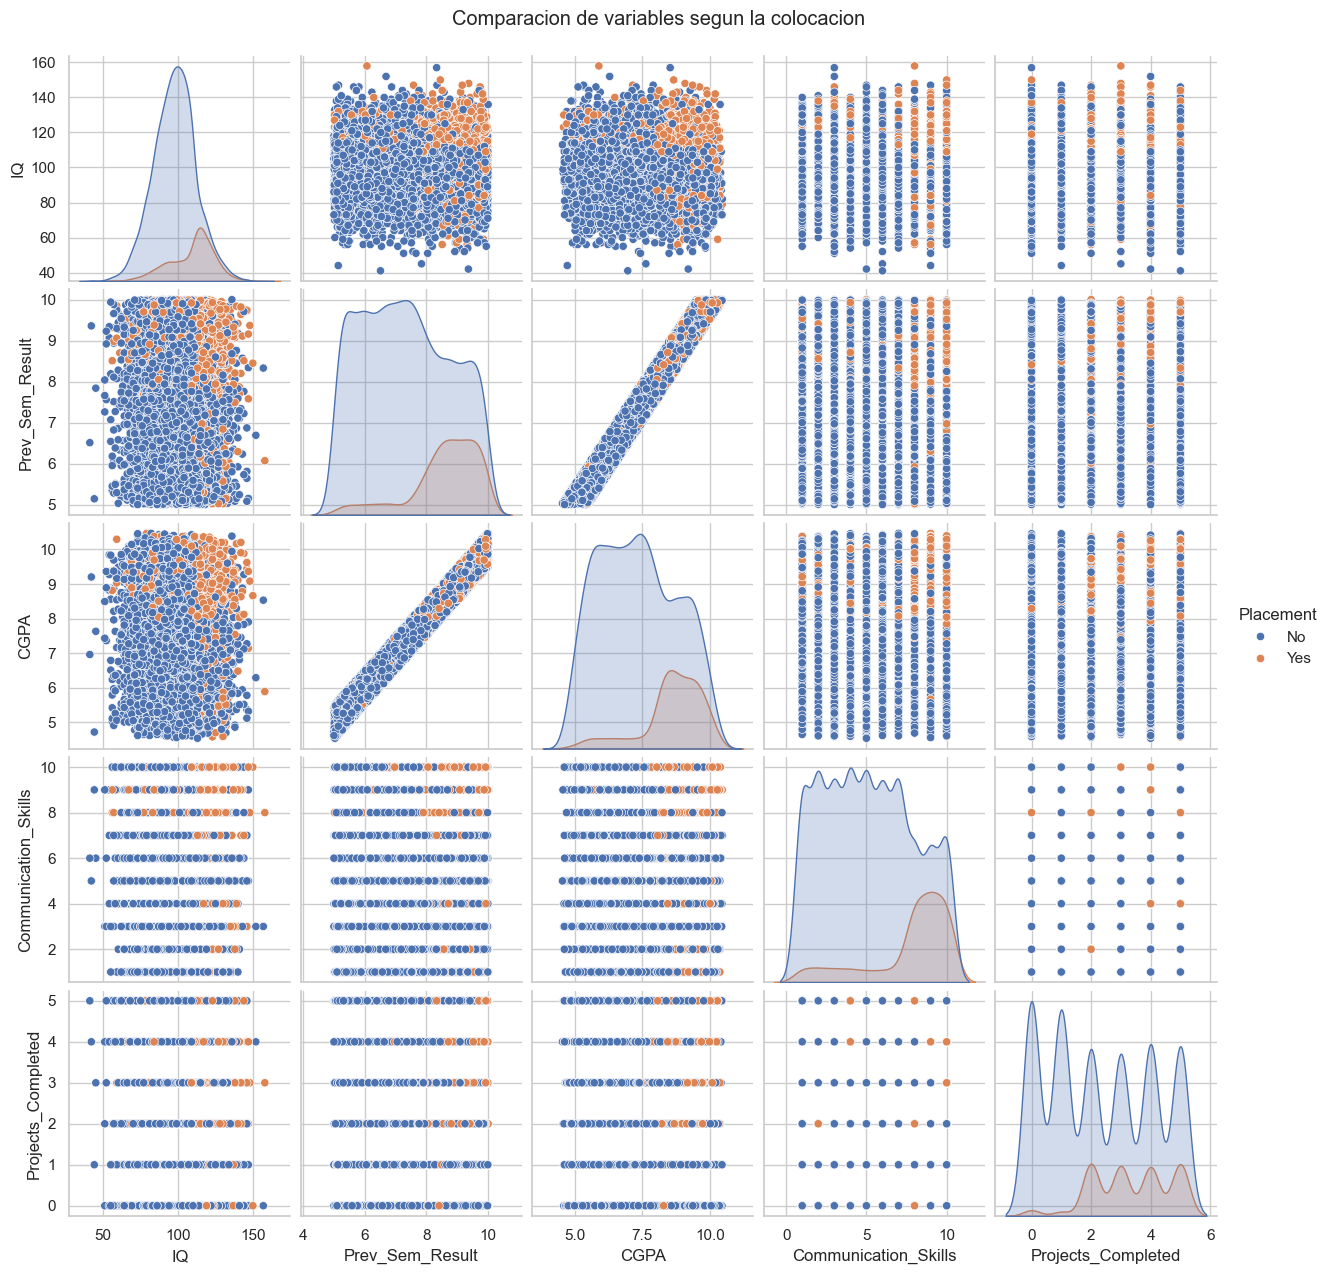

In [38]:
sns.pairplot(df,hue='Placement',vars=['IQ','Prev_Sem_Result','CGPA','Communication_Skills','Projects_Completed'])
plt.suptitle("Comparacion de variables segun la colocacion", y=1.02)

In [44]:
def evaluar_variables(var_significativas):
    x= df[var_significativas]
    y= df['Placement_numeric']

    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

    modelo= LogisticRegression()
    modelo.fit(x_train,y_train)
    
    y_pred = modelo.predict(x_test)
    acurracy = accuracy_score(y_test,y_pred) *100

    print(f"Exactitud del modelo usando {var_significativas} es de: {acurracy:.2f}%")
    print("Matrix de confusion")
    print(confusion_matrix(y_test,y_pred))
    print("\nReporte de Clasificacion")
    print(classification_report(y_test,y_pred))

evaluar_variables(['IQ','Prev_Sem_Result','CGPA','Communication_Skills'])

Exactitud del modelo usando ['IQ', 'Prev_Sem_Result', 'CGPA', 'Communication_Skills'] es de: 88.35%
Matrix de confusion
[[1593   81]
 [ 152  174]]

Reporte de Clasificacion
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1674
           1       0.68      0.53      0.60       326

    accuracy                           0.88      2000
   macro avg       0.80      0.74      0.77      2000
weighted avg       0.88      0.88      0.88      2000



Exactitud del modelo usando las variables ['IQ', 'CGPA', 'Communication_Skills', 'Projects_Completed'] es de: 100.00%
[[1674    0]
 [   0  326]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1674
           1       1.00      1.00      1.00       326

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

IQ: 0.214
CGPA: 0.322
Communication_Skills: 0.173
Projects_Completed: 0.291


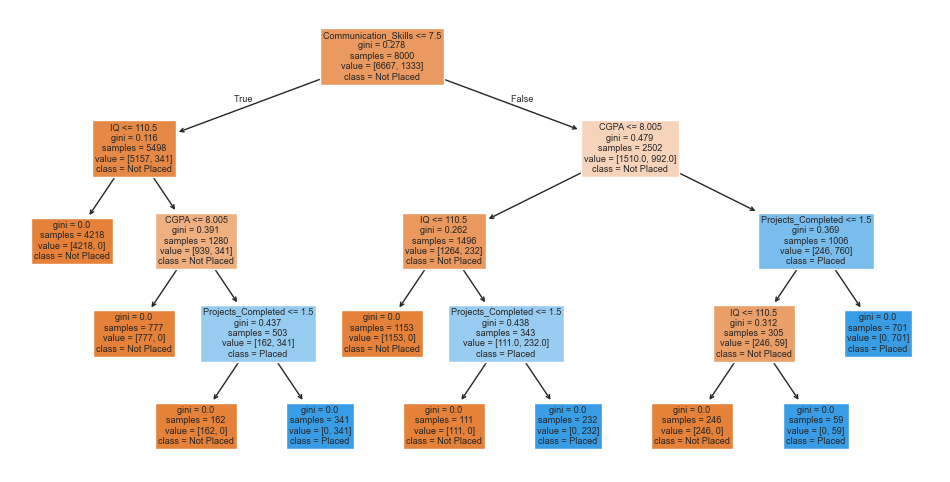

<Figure size 640x480 with 0 Axes>

In [42]:
def evaluar_variablestree(var_significativas):
    x=df[var_significativas]
    y=df['Placement_numeric']


    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    modelo = DecisionTreeClassifier(max_depth=4)
    modelo.fit(x_train,y_train)


    y_pred = modelo.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred) *100
    print(f"Exactitud del modelo usando las variables {var_significativas} es de: {accuracy:.2f}%")
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

    importancias = modelo.feature_importances_
    for var, imp in zip(x.columns,importancias):
        print(f"{var}: {imp:.3f}")

    plt.figure(figsize=(12,6))
    plot_tree(modelo ,feature_names = x.columns , class_names = ["Not Placed","Placed"],filled=True)
    plt.show()
    plt.savefig("arbol de desicion.png")

evaluar_variablestree(['IQ','CGPA','Communication_Skills','Projects_Completed'])


C:\Users\moral\AppData\Local\Temp\ipykernel_7760\2023536039.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_scores,y=model_names,palette='Blues_d')


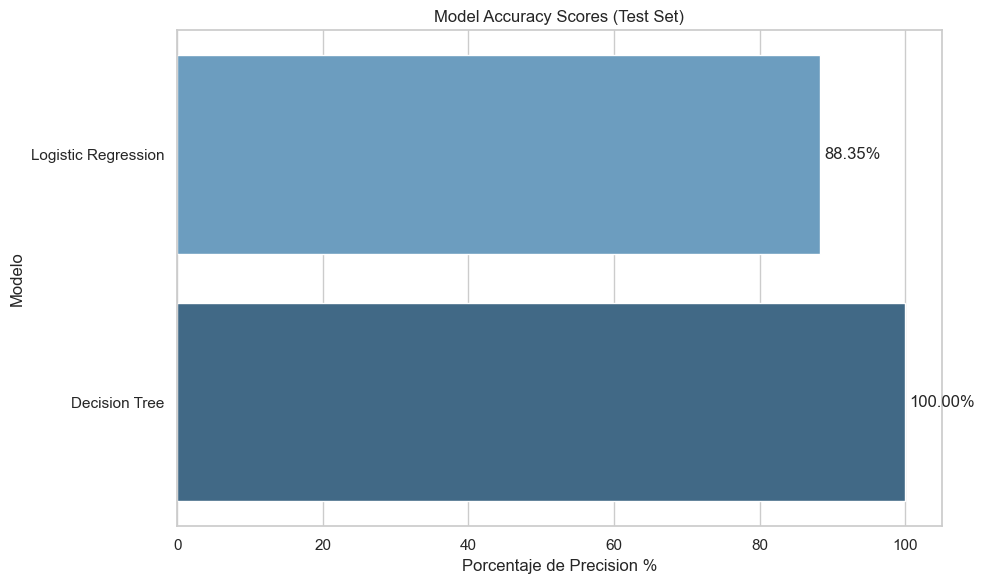

In [46]:
accuracy_scores=[88.35,100]
model_names=["Logistic Regression","Decision Tree"]


sns.set(style='whitegrid')
plt.figure(figsize=(10,6))

sns.barplot(x=accuracy_scores,y=model_names,palette='Blues_d')

for index,value in enumerate(accuracy_scores):
    plt.text(value + 0.5 , index , f"{value:.2f}%",va='center')

plt.title('Model Accuracy Scores (Test Set)')
plt.xlabel('Porcentaje de Precision %')
plt.ylabel('Modelo')
plt.tight_layout()

